## Ajuste de curvas: emision CO2
**Integrantes**


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import optimize as opt

In [53]:
data = pd.read_csv("co-emissions-per-capita.csv")

In [92]:
# Aqui se agregan los codigos de paises para analizar
Code = ['USA', 'MEX', 'FRA', 'GBR', 'KOR']

In [93]:
def retrieve_data(Code):
    country_data = []
    for i in range(len(Code)):
        country_data.append(pd.DataFrame(data[data['Code'] == Code[i]].values, columns = ['Entity', 'Code', 'Year', 'Per capita CO2 emissions']))
    return country_data

In [94]:
country_data = retrieve_data(Code)

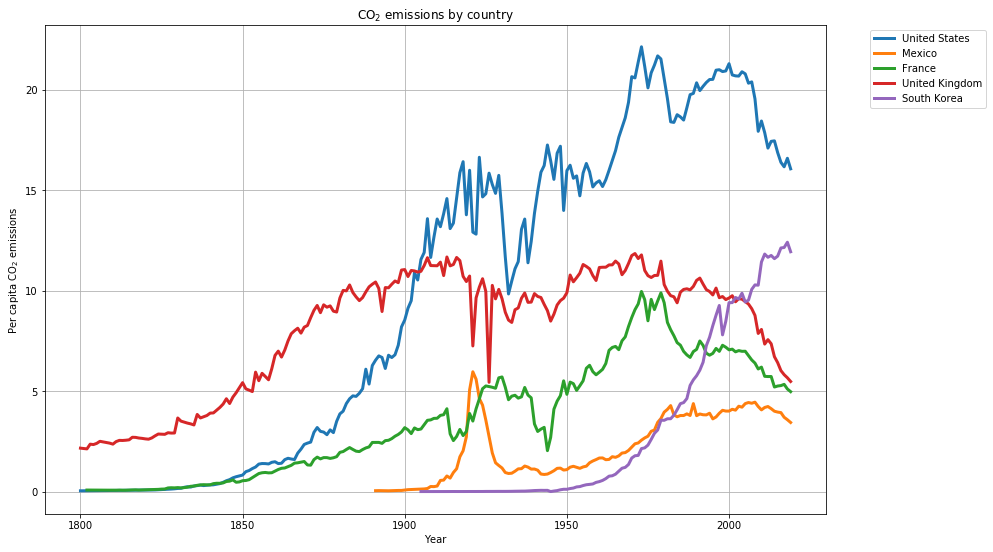

In [95]:
plt.figure(figsize=(14,9))
for i in range(len(Code)):
    plt.plot(country_data[i]['Year'], country_data[i]['Per capita CO2 emissions'], lw=3, label=country_data[i]['Entity'][0])
    
plt.xlabel('Year')
plt.ylabel('Per capita CO$ _2$ emissions')
plt.title('CO$ _2$ emissions by country')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')